In [1]:
from Bio import Entrez

def search(query):
    Entrez.email = 'pg45463@alunos.uminho.pt'
    handle = Entrez.esearch(db='pubmed', sort='relevance', retmax='10',retmode='xml', term=query)
    results = Entrez.read(handle)
    return results

def fetch_details(id_list):
    ids = ','.join(id_list)
    Entrez.email = 'pg45463@alunos.uminho.pt'
    handle = Entrez.efetch(db='pubmed', retmode='xml', id=ids)
    results = Entrez.read(handle)
    return results

if __name__ == '__main__':
    results = search('mtrA gene Mycobacterium tuberculosis')
    id_list = results['IdList']
    papers = fetch_details(id_list)
    for i, paper in enumerate(papers['PubmedArticle']):
        print("{}) {}".format(i+1, paper['MedlineCitation']['Article']['ArticleTitle']))

1) Global mapping of MtrA-binding sites links MtrA to regulation of its targets in Mycobacterium tuberculosis.
2) MtrA, an essential response regulator of the MtrAB two-component system, regulates the transcription of resuscitation-promoting factor B of Mycobacterium tuberculosis.
3) Mycobacterium tuberculosis oriC sequestration by MtrA response regulator.
4) Mycobacterium tuberculosis MtrB sensor kinase interactions with FtsI and Wag31 proteins reveal a role for MtrB distinct from that regulating MtrA activities.
5) Septal localization of the Mycobacterium tuberculosis MtrB sensor kinase promotes MtrA regulon expression.
6) Mycobacterium tuberculosis mtrA merodiploid strains with point mutations in the signal-receiving domain of MtrA exhibit growth defects in nutrient broth.
7) Inhibition of the DevSR Two-Component System by Overexpression of Mycobacterium tuberculosis PknB in Mycobacterium smegmatis.
8) Transcriptional and proteomic analyses of two-component response regulators in mu

In [2]:
from Bio import Entrez,SeqIO
from Bio.Blast import NCBIWWW, NCBIXML

Entrez.email = "pg45463@alunos.uminho.pt" 
handleAAC = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NC_000962.3",seq_start="314309",seq_stop="314854") 
handlemtrA = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="NC_000962.3",seq_start="3626663",seq_stop="3627349") 

recordAAC=SeqIO.read(handleAAC,"gb")
recordmtrA=SeqIO.read(handlemtrA,"gb")

print(recordAAC, '\n')

print(recordmtrA)

write = SeqIO.write(recordAAC,"AAC","gb")
write = SeqIO.write(recordmtrA,"mtrA","gb")

handleAAC.close()
handlemtrA.close()

ID: NC_000962.3
Name: NC_000962
Description: Mycobacterium tuberculosis H37Rv, complete genome
Database cross-references: BioProject:PRJNA57777, Assembly:GCF_000195955.2
Number of features: 3
/molecule_type=DNA
/topology=linear
/data_file_division=CON
/date=14-DEC-2017
/accessions=['NC_000962', 'REGION:', '314309..314854']
/sequence_version=3
/keywords=['RefSeq', 'complete genome']
/source=Mycobacterium tuberculosis H37Rv
/organism=Mycobacterium tuberculosis H37Rv
/taxonomy=['Bacteria', 'Actinobacteria', 'Corynebacteriales', 'Mycobacteriaceae', 'Mycobacterium', 'Mycobacterium tuberculosis complex']
/references=[Reference(title='TubercuList--10 years after', ...), Reference(title='Re-annotation of the genome sequence of Mycobacterium tuberculosis H37Rv', ...), Reference(title='Deciphering the biology of Mycobacterium tuberculosis from the complete genome sequence', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)]
/comment=REVIEWED REFSEQ: This 

In [3]:
#ANNOTATIONS GENE AAC
print(recordAAC.annotations["molecule_type"])
print(recordAAC.annotations["topology"])
print(recordAAC.annotations["accessions"])
print(recordAAC.annotations["keywords"])
print(recordAAC.annotations["organism"])
print(recordAAC.annotations["taxonomy"])

DNA
linear
['NC_000962', 'REGION:', '314309..314854']
['RefSeq', 'complete genome']
Mycobacterium tuberculosis H37Rv
['Bacteria', 'Actinobacteria', 'Corynebacteriales', 'Mycobacteriaceae', 'Mycobacterium', 'Mycobacterium tuberculosis complex']


In [4]:
#ANNOTATIONS GENE mtrA
print(recordmtrA.annotations["molecule_type"])
print(recordmtrA.annotations["topology"])
print(recordmtrA.annotations["accessions"])
print(recordmtrA.annotations["keywords"])
print(recordmtrA.annotations["organism"])
print(recordmtrA.annotations["taxonomy"])

DNA
linear
['NC_000962', 'REGION:', '3626663..3627349']
['RefSeq', 'complete genome']
Mycobacterium tuberculosis H37Rv
['Bacteria', 'Actinobacteria', 'Corynebacteriales', 'Mycobacteriaceae', 'Mycobacterium', 'Mycobacterium tuberculosis complex']


In [5]:
#AAC
for feat in recordAAC.features:
    print (feat)


featcds = []
for i in range(len(recordAAC.features)): 
    if recordAAC.features[i].type == "CDS":
        featcds.append(i)
    for k in featcds:
        print (recordAAC.features[k].location)
    for k in featcds:
        print (recordAAC.features[k].extract(recordAAC.seq))

type: source
location: [0:546](+)
qualifiers:
    Key: db_xref, Value: ['taxon:83332']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Mycobacterium tuberculosis H37Rv']
    Key: strain, Value: ['H37Rv']
    Key: type_material, Value: ['type strain of Mycobacterium tuberculosis']

type: gene
location: [0:546](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:886648']
    Key: gene, Value: ['aac']
    Key: locus_tag, Value: ['Rv0262c']

type: CDS
location: [0:546](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:886648']
    Key: experiment, Value: ['COORDINATES:Mass spectrometry[PMID:21969609]', 'DESCRIPTION:Gene expression[PMID:9159528]', 'EXISTENCE:Mass spectrometry[PMID:14532352]']
    Key: gene, Value: ['aac']
    Key: locus_tag, Value: ['Rv0262c']
    Key: product, Value: ["aminoglycoside 2'-N-acetyltransferase"]
    Key: protein_id, Value: ['NP_214776.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MH

In [6]:
#mtrA
for feat in recordmtrA.features:
    print (feat)


featcds = []
for i in range(len(recordmtrA.features)): 
    if recordmtrA.features[i].type == "CDS":
        featcds.append(i)
    for k in featcds:
        print (recordmtrA.features[k].location)
    for k in featcds:
        print (recordmtrA.features[k].extract(recordmtrA.seq))

type: source
location: [0:687](+)
qualifiers:
    Key: db_xref, Value: ['taxon:83332']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Mycobacterium tuberculosis H37Rv']
    Key: strain, Value: ['H37Rv']
    Key: type_material, Value: ['type strain of Mycobacterium tuberculosis']

type: repeat_region
location: [<0:4](-)
qualifiers:
    Key: note, Value: ['53 bp Mycobacterial Interspersed Repetitive Unit,Class II']

type: gene
location: [0:687](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:888743']
    Key: gene, Value: ['mtrA']
    Key: locus_tag, Value: ['Rv3246c']

type: CDS
location: [0:687](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:888743']
    Key: experiment, Value: ['COORDINATES:Mass spectrometry[PMID:21969609]', 'DESCRIPTION:Gene expression, protein purification and characterization[PMID:8655513]', 'DESCRIPTION:Gene expression[PMID:16629667]', 'EXISTENCE:Mass spectrometry[PMID:21920479]']
    Key: gene, Value: [

In [7]:
from Bio import SeqIO
#GENE AAC
all_species = []
for record in SeqIO.parse("AAC","genbank"):
    all_species.append(recordAAC.annotations["organism"])
    print (all_species)
    
#GENE mtrA
all_species = []
for record in SeqIO.parse("mtrA","genbank"):
    all_species.append(recordmtrA.annotations["organism"])
    print (all_species)

['Mycobacterium tuberculosis H37Rv']
['Mycobacterium tuberculosis H37Rv']


In [8]:
#Conversão em FASTA
count = SeqIO.convert("AAC", "genbank", "AAC.fasta", "fasta")
print ("Convertidos %i registos" % count )

count = SeqIO.convert("mtrA", "genbank", "mtrA.fasta", "fasta")
print ("Convertidos %i registos" % count )

Convertidos 1 registos
Convertidos 1 registos


In [9]:
from Bio.Blast import NCBIWWW

sequence_dataAAC = open("AAC.fasta").read() 
print(sequence_dataAAC)

sequence_datamtrA = open("mtrA.fasta").read() 
print(sequence_datamtrA)

>NC_000962.3 Mycobacterium tuberculosis H37Rv, complete genome
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCGAGGTGTCCAGGCTGAT
GTCGATGGGCAGGACGAACACCGTTCCGTCGTCATCGGGTGTACGGACTGGACCGGTTGG
TGCCAGTACCGATGTCGGGCCGTGCCAGGGCAGCCAGCCGCGTGAGGCGTACAGTCTGCG
GGCCCGCGCCGAGGAACTGAGCGCTCCGAGCTGGTAAGCGCCGCGCATCACCTGCTCGAC
GGCGTCCAACAGCGCGCTCACCAGGCGTTGGCCCCGCCAGTCCGCCCGCACCGCAACGCC
TTCGACGTACCCGCAGCGCAGCGCGTTGCCGCGGTAGATCAGTCGCCGCTGGATCACCGC
GGCATGCGCGATGATCGCCCCGTGATGCCAGATCAGGGCGTGCATCCCACCCAGCGTGTG
CTCCCAGTCGGTCTCGGTGAAGTCACCGGCAAACGCGCCGGTGACCATCTGACGGATGTC
CTGGCGGGTCTCGCTGTCAAGATCGGCGGTGTGGACCAGGCGGGCCGTGTGTACCTGGGT
GTGCAC

>NC_000962.3 Mycobacterium tuberculosis H37Rv, complete genome
TCACGGAGGTCCGGCCTTGTACCCCACTCCTCGAACGGTCAGCACCACAGTCGGGTTCTC
GGGATCCTTTTCGACCTTGGCCCGCAGACGCTGGACATGCACGTTCACCAGCCTGGTATC
GGCTGGGTGCCGGTAACCCCATACCTGTTCGAGCAGCACATCACGAGTAAACACCTGGCG
CGGCTTGCGCGCCAATGCGACCAACAGGTCGAATTCCAGCGGTGTCAACGAGATCTGCTC
ACCGTTGCGAGTGACCTTGTGCGCCGGTACGTCGATTTCTACGTCGGCGATGGACAGCAT
CTCGGCGGGTTC

### Blast

In [10]:
result_handleAAC = NCBIWWW.qblast("blastn", "nt", sequence_dataAAC, nucl_reward= 1, nucl_penalty= -2, filter= True, entrez_query ='all [filter] NOT Mycobacterium tuberculosis[organism] OR environmental samples[organism] OR metagenomes[organism]')
print(result_handleAAC)

In [11]:
seq_recordAAC = next(SeqIO.parse(open('AAC.fasta'),'fasta')) 
print(seq_recordAAC.id)

with open('my_blastAAC.xml', 'w') as save_file: 
    blast_resultsAAC = result_handleAAC.read() 
    save_file.write(blast_resultsAAC)

NC_000962.3


In [12]:
#GENE AAC
from Bio.Blast import NCBIXML
E_VALUE_THRESH = 0.05
for recordAAC in NCBIXML.parse(open("my_blastAAC.xml")): 
    print(recordAAC.gap_penalties)
    if recordAAC.alignments: 
        print("\n") 
        print("query: %s" % recordAAC.query[:545], '\n') 
        for alignAAC in recordAAC.alignments: 
            for hspAAC in alignAAC.hsps: 
                if hspAAC.expect < E_VALUE_THRESH: 
                    print ('****Alignment****', '\n')
                    print ('sequence:', alignAAC.title)
                    print ('length:', alignAAC.length)
                    print ('e value:', hspAAC.expect)
                    print (hspAAC.query[0:50] + '...' + hspAAC.query[-50:])
                    print( hspAAC.match[0:50] + '...' + hspAAC.match[-50:])
                    print( hspAAC.sbjct[0:50] + '...' + hspAAC.sbjct[-50:], '\n')

(5, 2)


query: NC_000962.3 Mycobacterium tuberculosis H37Rv, complete genome 

****Alignment**** 

sequence: gi|1929268027|gb|CP063804.1| Mycobacterium orygis strain MUHC/MB/EPTB/Orygis/51145 chromosome, complete genome
length: 4352172
e value: 0.0
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCGAGGTGT...TCAAGATCGGCGGTGTGGACCAGGCGGGCCGTGTGTACCTGGGTGTGCAC
||||||||||||||||||||||||||||||||||||||||||||||||||...||||||||||||||||||||||||||||||||||||||||||||||||||
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCGAGGTGT...TCAAGATCGGCGGTGTGGACCAGGCGGGCCGTGTGTACCTGGGTGTGCAC 

****Alignment**** 

sequence: gi|432164605|emb|FO203510.1| Mycobacterium canettii CIPT 140070017 complete genome
length: 4524466
e value: 0.0
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCGAGGTGT...TCAAGATCGGCGGTGTGGACCAGGCGGGCCGTGTGTACCTGGGTGTGCAC
||||||||||||||||||||||||||||||||||||||||||||||||||...||||||||||||||||||||||||||||||||||||||||||||||||||
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCGAGGTGT...TCAAGATCGGCGGTGTGGACCAGGCGGGCCGTG

In [13]:
#GENE mtrA

In [14]:
result_handlemtrA = NCBIWWW.qblast("blastn", "nt", sequence_datamtrA, entrez_query = 'all [filter] NOT Mycobacterium tuberculosis[organism] OR environmental samples[organism] OR metagenomes[organism]')

print(result_handlemtrA)

In [15]:
seq_recordmtrA = next(SeqIO.parse(open('mtrA.fasta'),'fasta')) 
print(seq_recordmtrA.id)
    
with open('my_blastmtrA.xml', 'w') as save_file: 
    blast_resultsmtrA = result_handlemtrA.read() 
    save_file.write(blast_resultsmtrA)

NC_000962.3


In [16]:
#GENE mtrA
from Bio.Blast import NCBIXML
E_VALUE_THRESH = 0.05
for recordmtrA in NCBIXML.parse(open("my_blastmtrA.xml")): 
    print(recordmtrA.gap_penalties)
    if recordmtrA.alignments: 
        print("\n") 
        print("query: %s" % recordmtrA.query[:687], '\n') 
        for alignmtrA in recordmtrA.alignments: 
            for hspmtrA in alignmtrA.hsps: 
                if hspmtrA.expect < E_VALUE_THRESH: 
                    print ('****Alignment****', '\n')
                    print ('sequence:', alignmtrA.title)
                    print ('length:', alignmtrA.length)
                    print ('e value:', hspmtrA.expect)
                    print (hspmtrA.query[0:50] + '...' + hspmtrA.query[-50:])
                    print( hspmtrA.match[0:50] + '...' + hspmtrA.match[-50:])
                    print( hspmtrA.sbjct[0:50] + '...' + hspmtrA.sbjct[-50:], '\n')

(5, 2)


query: NC_000962.3 Mycobacterium tuberculosis H37Rv, complete genome 

****Alignment**** 

sequence: gi|432156676|emb|FO203508.1| Mycobacterium canettii CIPT 140070008 complete genome
length: 4420197
e value: 0.0
TCACGGAGGTCCGGCCTTGTACCCCACTCCTCGAACGGTCAGCACCACAG...AACGAAGCGTCGTCGTCAACGACCAAAATCCTTTGCCTCATGGTGTCCAT
||||||||||||||||||||||||||||||||||||||||||||||||||...||||||||||||||||||||||||||||||||||||||||||||||||||
TCACGGAGGTCCGGCCTTGTACCCCACTCCTCGAACGGTCAGCACCACAG...AACGAAGCGTCGTCGTCAACGACCAAAATCCTTTGCCTCATGGTGTCCAT 

****Alignment**** 

sequence: gi|432156676|emb|FO203508.1| Mycobacterium canettii CIPT 140070008 complete genome
length: 4420197
e value: 2.21707e-10
GCGGCGCAGCCGCGCCCGCACCCGCGCAACCAGCTCCTTGGGCTTGAACG...TTGGGCTTGAACGGCTTCATGATGTAGTCGTCGGCGCCCGACTCCAGACC
||||||||||  | | |||| ||| || |||||||||| | |  ||||||...| | |  ||||||||||  | ||||||||||||||||||||   ||||||
GCGGCGCAGCAACCCGCGCAACCGGGCGACCAGCTCCTCGAGGCTGAACG...TCGAGGCTGAACGGCTTTGTCATGTAGTCGTCGGCGCCCGAGGTCAGACC 



### SwissProt

In [17]:
from Bio import ExPASy
from Bio import SwissProt
handleAAC=ExPASy.get_sprot_raw('P9WQG9')
handlemtrA=ExPASy.get_sprot_raw('P9WGM7')

In [18]:
recordAAC=SwissProt.read(handleAAC)
print(recordAAC)

In [19]:
recordmtrA=SwissProt.read(handlemtrA)
print(recordmtrA)

In [20]:
print(recordAAC.description)
print(recordmtrA.description)

RecName: Full=Aminoglycoside 2'-N-acetyltransferase; EC=2.3.1.-; AltName: Full=AAC(2')-Ic {ECO:0000303|PubMed:9159528};
RecName: Full=DNA-binding response regulator MtrA;


In [21]:
for refAAC in recordAAC.references:
    print('autores:',refAAC.authors)
    print('título:',refAAC.title)

autores: Ainsa J.A., Perez E., Pelicic V., Berthet F.-X., Gicquel B., Martin C.
título: Aminoglycoside 2'-N-acetyltransferase genes are universally present in mycobacteria: characterization of the aac(2')-Ic gene from Mycobacterium tuberculosis and the aac(2')-Id gene from Mycobacterium smegmatis.
autores: Cole S.T., Brosch R., Parkhill J., Garnier T., Churcher C.M., Harris D.E., Gordon S.V., Eiglmeier K., Gas S., Barry C.E. III, Tekaia F., Badcock K., Basham D., Brown D., Chillingworth T., Connor R., Davies R.M., Devlin K., Feltwell T., Gentles S., Hamlin N., Holroyd S., Hornsby T., Jagels K., Krogh A., McLean J., Moule S., Murphy L.D., Oliver S., Osborne J., Quail M.A., Rajandream M.A., Rogers J., Rutter S., Seeger K., Skelton S., Squares S., Squares R., Sulston J.E., Taylor K., Whitehead S., Barrell B.G.
título: Deciphering the biology of Mycobacterium tuberculosis from the complete genome sequence.
autores: Kelkar D.S., Kumar D., Kumar P., Balakrishnan L., Muthusamy B., Yadav A.K.,

In [22]:
for refmtrA in recordmtrA.references:
    print('autores:',refmtrA.authors)
    print('título:',refmtrA.title)

autores: Via L.E., Curcic R., Mudd M.H., Dhandayuthapani S., Ulmer R.J., Deretic V.
título: Elements of signal transduction in Mycobacterium tuberculosis: in vitro phosphorylation and in vivo expression of the response regulator MtrA.
autores: Cole S.T., Brosch R., Parkhill J., Garnier T., Churcher C.M., Harris D.E., Gordon S.V., Eiglmeier K., Gas S., Barry C.E. III, Tekaia F., Badcock K., Basham D., Brown D., Chillingworth T., Connor R., Davies R.M., Devlin K., Feltwell T., Gentles S., Hamlin N., Holroyd S., Hornsby T., Jagels K., Krogh A., McLean J., Moule S., Murphy L.D., Oliver S., Osborne J., Quail M.A., Rajandream M.A., Rogers J., Rutter S., Seeger K., Skelton S., Squares S., Squares R., Sulston J.E., Taylor K., Whitehead S., Barrell B.G.
título: Deciphering the biology of Mycobacterium tuberculosis from the complete genome sequence.
autores: Zahrt T.C., Deretic V.
título: An essential two-component signal transduction system in Mycobacterium tuberculosis.
autores: Fol M., Chauha

In [23]:
print(recordAAC.organism_classification)
print(recordmtrA.organism_classification)

['Bacteria', 'Actinobacteria', 'Corynebacteriales', 'Mycobacteriaceae', 'Mycobacterium', 'Mycobacterium tuberculosis complex']
['Bacteria', 'Actinobacteria', 'Corynebacteriales', 'Mycobacteriaceae', 'Mycobacterium', 'Mycobacterium tuberculosis complex']


In [24]:
print(recordAAC.accessions)
print(recordmtrA.accessions)

['P9WQG9', 'L0T655', 'P0A5N0', 'P72033', 'P95219']
['P9WGM7', 'L0TES0', 'P0A5Z4', 'Q50447']


In [25]:
print(recordAAC.entry_name)
print(recordmtrA.entry_name)

AAC2_MYCTU
MTRA_MYCTU


In [26]:
print(recordAAC.sequence_length)
print(recordmtrA.sequence_length)

181
228


In [27]:
print(recordAAC.keywords)
print(recordmtrA.keywords)

['3D-structure', 'Acyltransferase', 'Antibiotic resistance', 'Reference proteome', 'Transferase']
['3D-structure', 'Cytoplasm', 'DNA-binding', 'Isopeptide bond', 'Metal-binding', 'Phosphoprotein', 'Reference proteome', 'Transcription', 'Transcription regulation', 'Two-component regulatory system', 'Ubl conjugation']


# Alinhamento múltiplo

In [28]:
from Bio import AlignIO
Alinhamento = AlignIO.read('AAC_gene.clw','clustal')
print(Alinhamento)

Alignment with 7 rows and 546 columns
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCG...CAC FO203508.1_315726-316271
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCG...CAC FO203509.1_328862-329407
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCG...CAC FO203510.1_315467-316012
TTACCAGACGTCGCCCGCGCGCCAATCGCACATTAGCTCCGCCG...CAC FO203507.1_319966-320511
TTACCAGACGTCGCCCGCGCGCCAATCGCACATTAGCTCCGCCG...CAC HE572590.1_321068-321613
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCG...CAC NC_000962.3
TTACCAGACGTCGCCCGCGCGCCAATCGCACATCAGCTCCGCCG...CAC CP063804.1_312498-313043


In [29]:
from Bio import AlignIO
Alinhamento = AlignIO.read('mtrA_gene.clw','clustal')
print(Alinhamento)

Alignment with 7 rows and 687 columns
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA NC_000962.3
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA CP063804.1_c3566456-3565770
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA FO203508.1_c3658681-3657995
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA FO203510.1_c3739586-3738900
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA FO203509.1_c3765372-3764686
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA FO203507.1_c3656009-3655323
ATGGACACCATGAGGCAAAGGATTTTGGTCGTTGACGACGACGC...TGA HE572590.1_c3684634-3683948


# Filogenia

Tree(rooted=False, weight=1.0)
    Clade(confidence=86.4)
        Clade(branch_length=0.0011525725, confidence=86.4)
            Clade(branch_length=0.00244523, confidence=9.8)
                Clade(branch_length=5e-09, confidence=84.3)
                    Clade(branch_length=0.00244041, name='FO203509.1_328862-329407')
                    Clade(branch_length=0.00486413, name='FO203508.1_315726-316271')
                Clade(branch_length=0.0048089, name='FO203510.1_315467-316012')
            Clade(branch_length=0.0024288, confidence=100)
                Clade(branch_length=0.0, name='HE572590.1_321068-321613')
                Clade(branch_length=0.0, name='FO203507.1_319966-320511')
        Clade(branch_length=0.0036650075, confidence=86.4)
            Clade(branch_length=0.00479693, name='CP063804.1_312498-313043')
            Clade(branch_length=5e-09, name='NC_000962.3') 

                        ______________ FO203509.1_328862-329407
                       |
         ___________

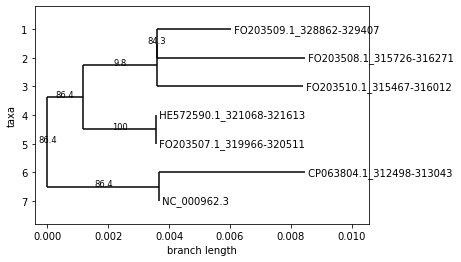

In [30]:
#AAC
from Bio import Phylo

tree = Phylo.read("AAC_tree.nwk", "newick")

print(tree, '\n')
Phylo.draw_ascii(tree), '\n'
Phylo.draw(tree)

Tree(rooted=False, weight=1.0)
    Clade(confidence=100)
        Clade(branch_length=0.0008226775, confidence=100)
            Clade(branch_length=5e-09, confidence=76.1)
                Clade(branch_length=5e-09, confidence=100)
                    Clade(branch_length=0.0, name='FO203508.1_c3658681-3657995')
                    Clade(branch_length=0.0, name='CP063804.1_c3566456-3565770')
                    Clade(branch_length=0.0, name='NC_000962.3')
                Clade(branch_length=0.0016479, name='FO203510.1_c3739586-3738900')
            Clade(branch_length=0.00164504, name='FO203509.1_c3765372-3764686')
        Clade(branch_length=0.0024705825, confidence=100)
            Clade(branch_length=0.0, name='FO203507.1_c3656009-3655323')
            Clade(branch_length=0.0, name='HE572590.1_c3684634-3683948') 

                 , FO203508.1_c3658681-3657995
                 |
                 | CP063804.1_c3566456-3565770
                 |
                 | NC_000962.3
           

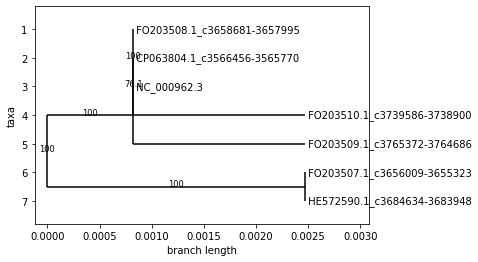

In [31]:
#mtrA
from Bio import Phylo

tree= Phylo.read("mtrA_tree.nwk", "newick")

print(tree, '\n')
Phylo.draw_ascii(tree), '\n'
Phylo.draw(tree)